# Custom Pipelines in EvalML

EvalML pipelines consist of modular components combining any number of transformers and an estimator. This allows you to create pipelines that fit the needs of your data to achieve the best results.

## Requirements
A custom pipeline must adhere to the following requirements:

1. Inherit from the proper pipeline base class
    - Binary classification - `BinaryClassificationPipeline`
    - Multiclass classification - `MulticlassClassificationPipeline`
    - Regression - `RegressionPipeline`


2. Have a `component_graph` list as a class variable detailing the structure of the pipeline. Each component in the graph can be provided as either a string name or an instance.

## Pipeline Configuration
There are a few other options to configure your custom pipeline.

### Custom Name
By default, a pipeline class's name property is the result of adding spaces between each Pascal case capitalization in the class name. E.g. `LogisticRegressionPipeline.name` will return 'Logistic Regression Pipeline'. Therefore, we suggest custom pipelines use Pascal case for their class names.

If you'd like to override the pipeline classes name attribute so it isn't derived from the class name, you can set the custom_name attribute, like so:

In [1]:
from evalml.pipelines import MulticlassClassificationPipeline

class CustomPipeline(MulticlassClassificationPipeline):
    component_graph = ['Simple Imputer', 'Logistic Regression Classifier']
    custom_name = 'A custom pipeline name'
    
print(CustomPipeline.name)

A custom pipeline name


### Custom Hyperparameters
To specify custom hyperparameter ranges, set the custom_hyperparameters property to be a dictionary where each key-value pair consists of a parameter name and range. AutoML will use this dictionary to override the hyperparameter ranges collected from each component in the component graph.

In [2]:
class CustomPipeline(MulticlassClassificationPipeline):
    component_graph = ['Simple Imputer', 'One Hot Encoder', 'Standard Scaler', 'Logistic Regression Classifier']

print("Without custom hyperparameters:")
print(CustomPipeline.hyperparameters)  
    
class CustomPipeline(MulticlassClassificationPipeline):
        component_graph = ['Simple Imputer', 'One Hot Encoder', 'Standard Scaler', 'Logistic Regression Classifier']
        custom_hyperparameters = {
        'Simple Imputer' : {
            'impute_strategy': ['most_frequent']
        }
    }

print()
print("With custom hyperparameters:")
print(CustomPipeline.hyperparameters)

Without custom hyperparameters:
{'Simple Imputer': {'impute_strategy': ['mean', 'median', 'most_frequent']}, 'One Hot Encoder': {}, 'Standard Scaler': {}, 'Logistic Regression Classifier': {'penalty': ['l2'], 'C': Real(low=0.01, high=10, prior='uniform', transform='identity')}}

With custom hyperparameters:
{'Simple Imputer': {'impute_strategy': ['most_frequent']}, 'One Hot Encoder': {}, 'Standard Scaler': {}, 'Logistic Regression Classifier': {'penalty': ['l2'], 'C': Real(low=0.01, high=10, prior='uniform', transform='identity')}}


To initialize our new custom pipeline class, we must pass in a `parameters` argument. If we want to use the defaults for each component, we can simply pass in an empty dictionary.

In [3]:
CustomPipeline(parameters={})

### Custom Parameters
You can also pass in custom parameters. The parameters dictionary needs to be in the format of a two-layered dictionary where the first key-value pair is the component name and component parameters dictionary. The component parameters dictionary consists of a key value pair of parameter name and parameter values. An example will be shown below and component parameters can be found [here](../api_reference.rst#components).

In [4]:
parameters = {
        'Simple Imputer': {
            'impute_strategy': 'mean'
        },
        'Logistic Regression Classifier': {
            'penalty': 'l2',
            'C': 1.0,
        }
    }

cp = CustomPipeline(parameters=parameters, random_state=5)


You can call `.graph()` to see each component and its parameters. Each component takes in data and feeds it to the next.

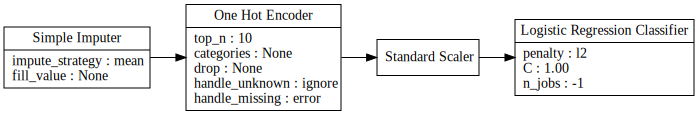

In [5]:
cp.graph()

You can see more detailed information by calling `.describe()`:

In [6]:
cp.describe()

*******************
* Custom Pipeline *
*******************

Problem Type: Multiclass Classification
Model Family: Linear

Pipeline Steps
1. Simple Imputer
	 * impute_strategy : mean
	 * fill_value : None
2. One Hot Encoder
	 * top_n : 10
	 * categories : None
	 * drop : None
	 * handle_unknown : ignore
	 * handle_missing : error
3. Standard Scaler
4. Logistic Regression Classifier
	 * penalty : l2
	 * C : 1.0
	 * n_jobs : -1


You can then fit and score an individual pipeline with an objective. An objective can either be a string representation of an EvalML objective or an EvalML objective class. You can find more objectives [here](../api_reference.rst#objective-functions).

In [7]:
from evalml.demos import load_wine

X, y = load_wine()
cp.fit(X, y)
cp.score(X, y, objectives=['log_loss_multi'])

OrderedDict([('Log Loss Multiclass', 0.03186139504848921)])